##### Universidade Federal de São Carlos - UFSCar <br>Centro de Ciências Exatas e Tecnólogicas - CCET

# Trabalho de Graduação
### Uma abordagem estatística sobre a estimação de _redshifts_ de quasares usando dados do S-PLUS
#### Visualização dos _PIT values_

Discente: Gabriela Pereira Soares<br>Orientador: Rafael Izbicki<br>Co-orientadora: Lilianne Nakazono

Outubro de 2022

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm, multivariate_normal, binom

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregando as coberturas calculadas no R
cov1_flx = pd.read_csv("C:/Users/Gabriela/Documents/TG/Códigos TG2/pit_broad_flx.csv", delimiter=',')['x']
cov2_flx = pd.read_csv("C:/Users/Gabriela/Documents/TG/Códigos TG2/pit_narrow_flx.csv", delimiter=',')['x']

In [3]:
cov1_nn = pd.read_csv("C:/Users/Gabriela/Documents/TG/Códigos TG2/pit_broad_nn.csv", delimiter=',')['x']
cov2_nn = pd.read_csv("C:/Users/Gabriela/Documents/TG/Códigos TG2/pit_narrow_nn.csv", delimiter=',')['x']

Como a função do github já implementada no _python_ apresenta alguns problemas, vamos defini-la aqui no Jupyter.

In [3]:
# Plota o histograma PIT/HPD e calcula o intervalo de confiança para os valores de bin, 
# onde os valores PIT/HPD seguem uma distribuição uniforme

def plot_pit_band(cov, ci_level=0.95, n_bins=20, title='PIT values'):

    sns.set(context="notebook", style="whitegrid", palette="dark",font_scale=1.4)
    
    n = cov.shape[0]
    ci_quantity = (1-ci_level)/2
    low_lim = binom.ppf(q=ci_quantity, n=n, p=1/n_bins)
    upp_lim = binom.ppf(q=ci_level + ci_quantity, n=n, p=1/n_bins)
    fig = plt.figure(figsize=(9,5))
    plot = sns.histplot(cov, bins=n_bins, color='#0072B2')
    plt.axhline(y=low_lim, color='grey')
    plt.axhline(y=upp_lim, color='grey')
    plt.axhline(y=n/n_bins, label='Média uniforme', color="red")
    plt.fill_between(x=np.linspace(0, 1, 100),
    y1=np.repeat(low_lim, 100),
    y2=np.repeat(upp_lim, 100),
    color='black', alpha=0.2)
    plt.legend(loc='upper center', prop={'size': 18})
    plt.xlabel("PIT values", size=16)
    plt.ylabel("Contagem", size=16)
    plt.ylim(0,600)
    plt.title(title)
    plt.show()
    return plot

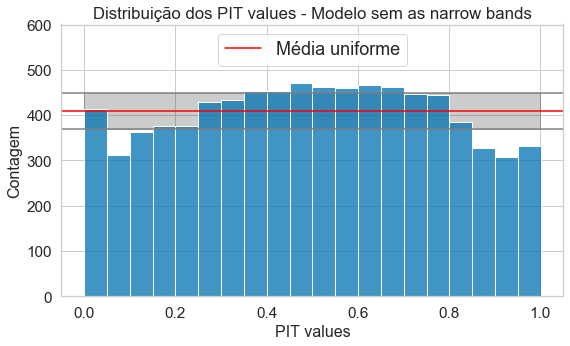

In [4]:
# Flexcode sem narrow
plot = plot_pit_band(cov1_flx, ci_level=0.95, n_bins=20, title='Distribuição dos PIT values - Modelo sem as narrow bands')

In [5]:
plot.get_figure().savefig("pit_broad_flexcode.png",  bbox_inches='tight')

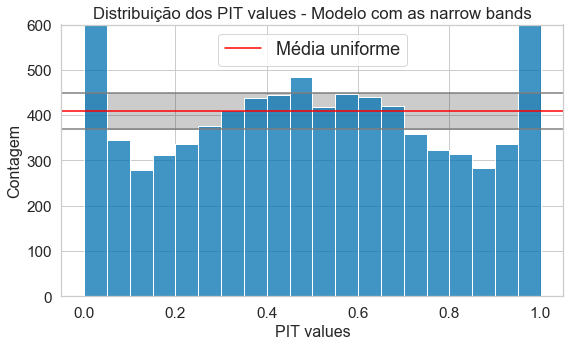

In [6]:
# Flexcode com narrow
plot = plot_pit_band(cov2_flx, ci_level=0.95, n_bins=20, title='Distribuição dos PIT values - Modelo com as narrow bands')

In [7]:
plot.get_figure().savefig("pit_narrow_flexcode.png",  bbox_inches='tight')

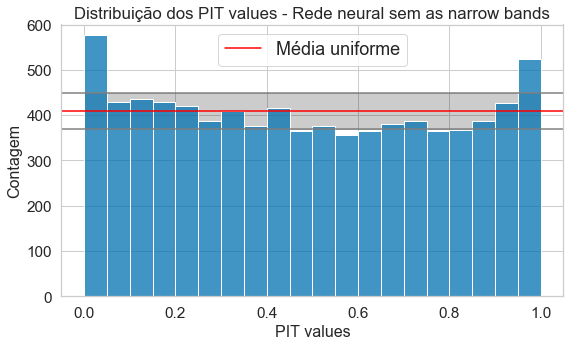

In [32]:
# Rede neural sem narrow
plot = plot_pit_band(cov1_nn, ci_level=0.95, n_bins=20, title='Distribuição dos PIT values - Rede neural sem as narrow bands')

In [26]:
plot.get_figure().savefig("pit_broad_nn.png",  bbox_inches='tight')

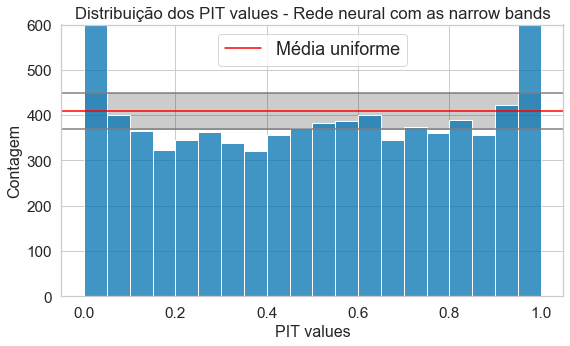

In [33]:
# Rede neural com narrow
plot = plot_pit_band(cov2_nn, ci_level=0.95, n_bins=20, title='Distribuição dos PIT values - Rede neural com as narrow bands')

In [28]:
plot.get_figure().savefig("pit_broad_nn.png",  bbox_inches='tight')